# Importing Necessary libraries and Datasets:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Projects/ML Intern@CodeAlpha/Task_1_Music Recommendation System/dataset_1.csv')
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


# Datatype Check:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

# Missing Values and Duplicated Values Check:

In [ ]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.duplicated().sum()

0

# Descriptive Statistics:

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,114000.0,56999.500000,32909.109681,0.000,28499.75000,56999.500000,85499.2500,113999.000
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996


# Histograms:

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>, <Axes: >, <Axes: >]],
      dtype=object)

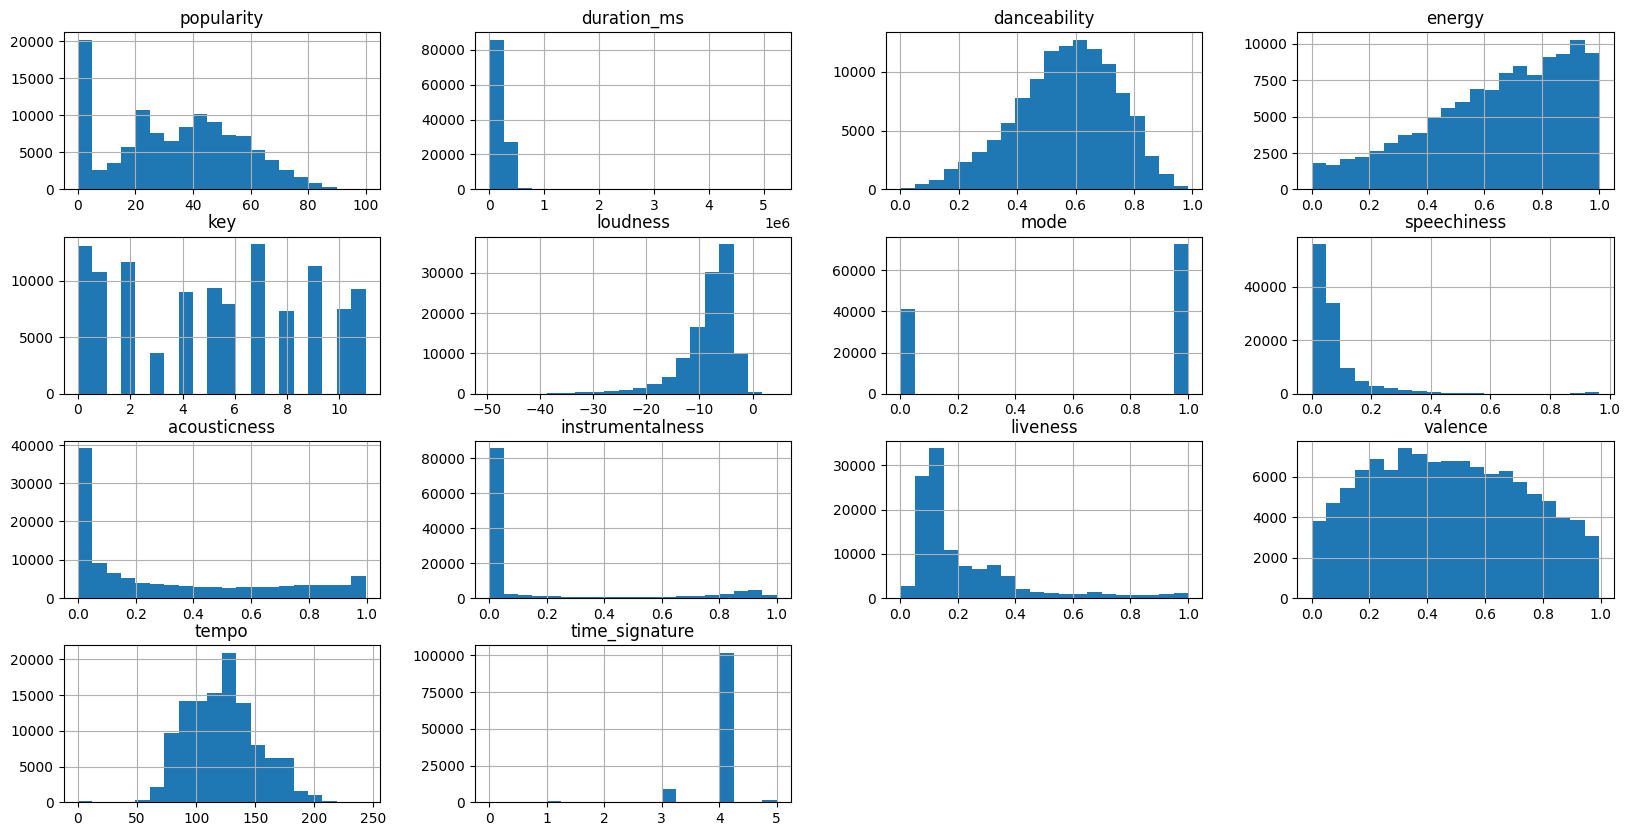

In [ ]:
df.hist(figsize=(20,10), bins = 20)

# Boxplots:

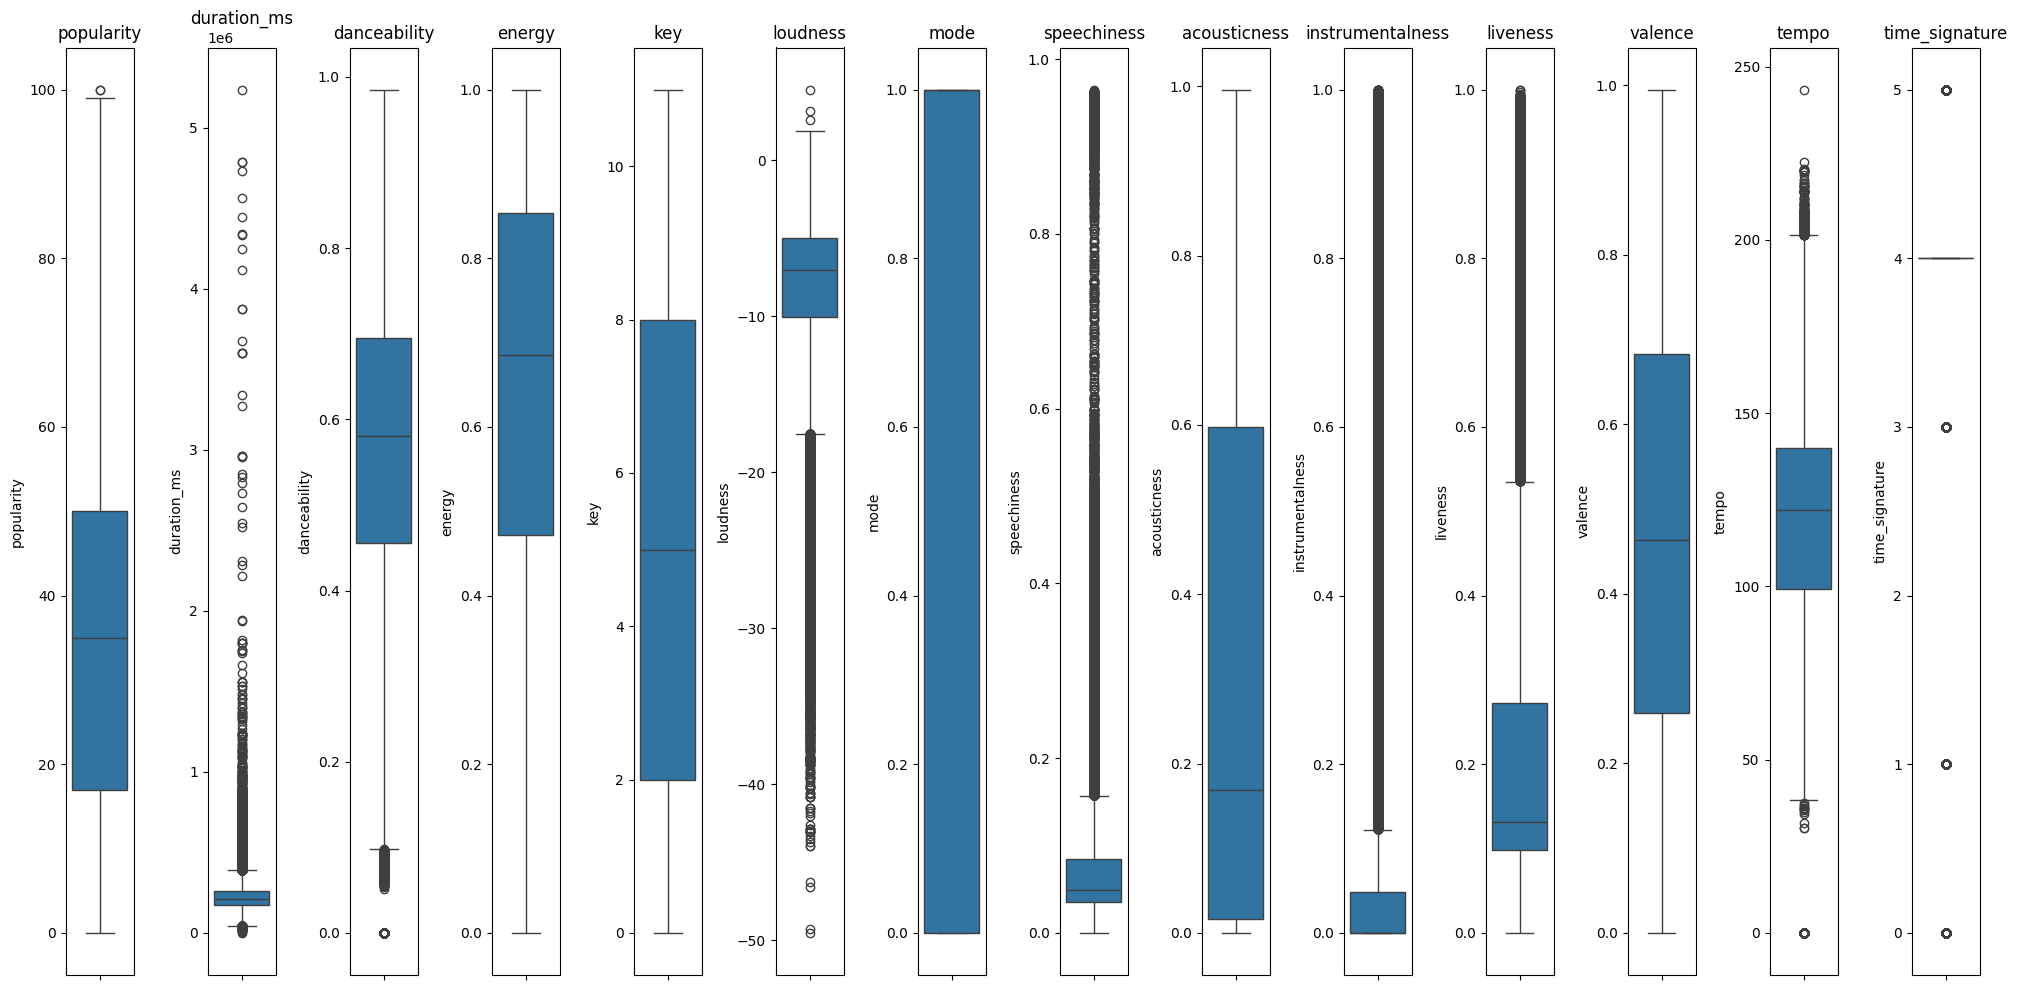

In [ ]:
# Get numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Create a subplot for boxplots
plt.figure(figsize=(20, 10))

# Draw boxplots for each numerical column using Seaborn
for i, col in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# Correlation between Popularity and other columns:

In [ ]:
# Select only numeric columns
numerical_df = df.select_dtypes(include=['int', 'float'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Extract the correlation of 'popularity' column with other columns
(correlation_matrix['popularity'].drop('popularity'))

duration_ms        -0.007101
danceability        0.035448
energy              0.001056
key                -0.003853
loudness            0.050423
mode               -0.013931
speechiness        -0.044927
acousticness       -0.025472
instrumentalness   -0.095139
liveness           -0.005387
valence            -0.040534
tempo               0.013205
time_signature      0.031073
Name: popularity, dtype: float64

<ipython-input-31-732a1a396a1a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=popularity_correlation.index, y=popularity_correlation.values, palette="viridis_r")


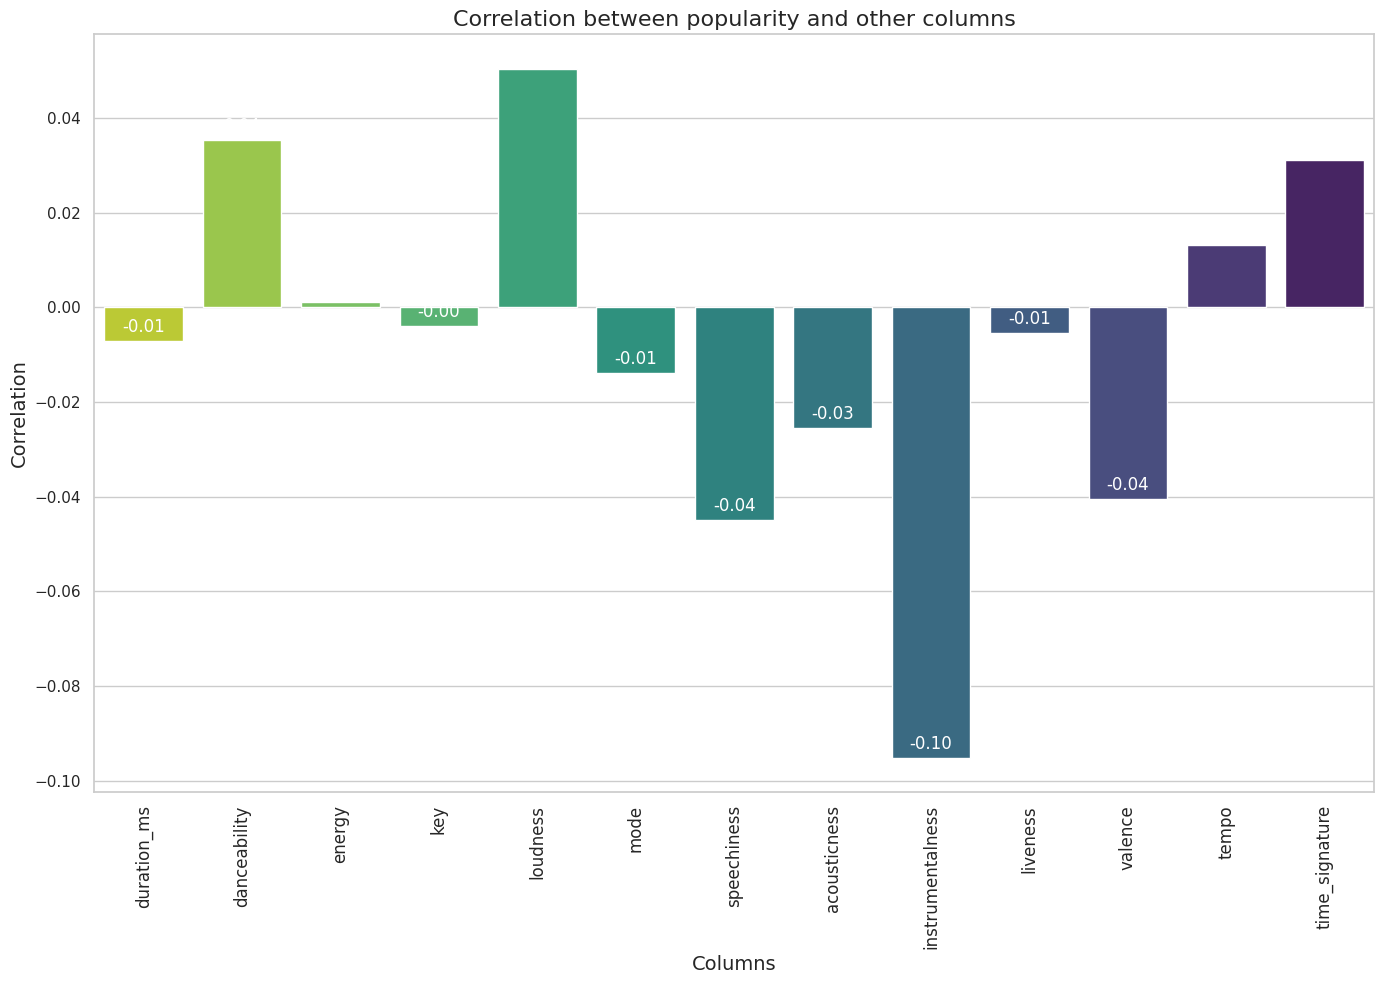

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_df = df.select_dtypes(include=['int', 'float'])

# Calculate the correlation between 'popularity' column and all other columns
popularity_correlation = numerical_df.corr()['popularity'].drop('popularity')

# Set the size of the figure
plt.figure(figsize=(14, 10))

# Create a bar plot
ax = sns.barplot(x=popularity_correlation.index, y=popularity_correlation.values, palette="viridis_r")

# Add annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12,
                color='white')  # Set annotation color to white

# Customize the plot
plt.title('Correlation between popularity and other columns', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Correlation', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()


# Top 20 Artists:

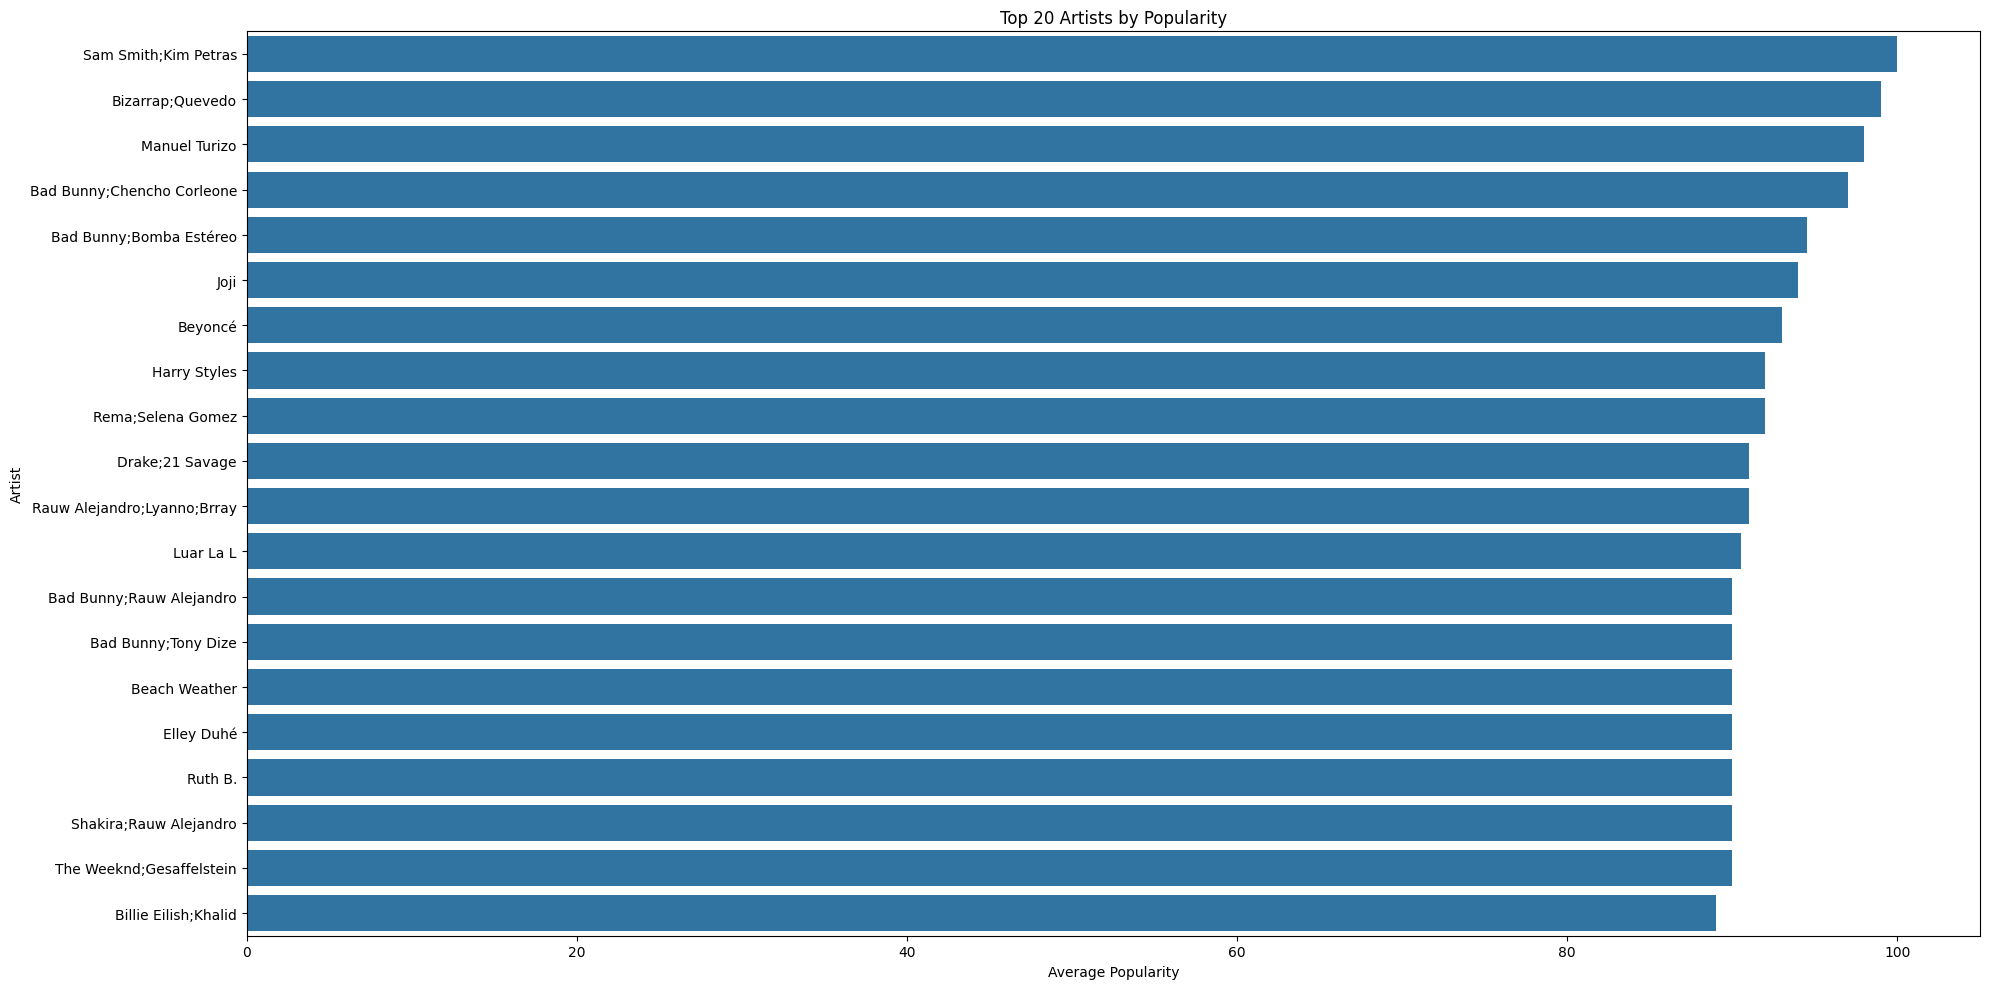

In [17]:
# Aggregate popularity scores by artist
artist_popularity = df.groupby('artists')['popularity'].mean().reset_index()

# Select the top 20 artists
top_20_artists = artist_popularity.nlargest(20, 'popularity')

# Plotting the top 20 artists with horizontal bars
plt.figure(figsize=(20, 10))
sns.barplot(data=top_20_artists, y='artists', x='popularity', orient='h')
plt.title('Top 20 Artists by Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()


# Top 20 Albums:

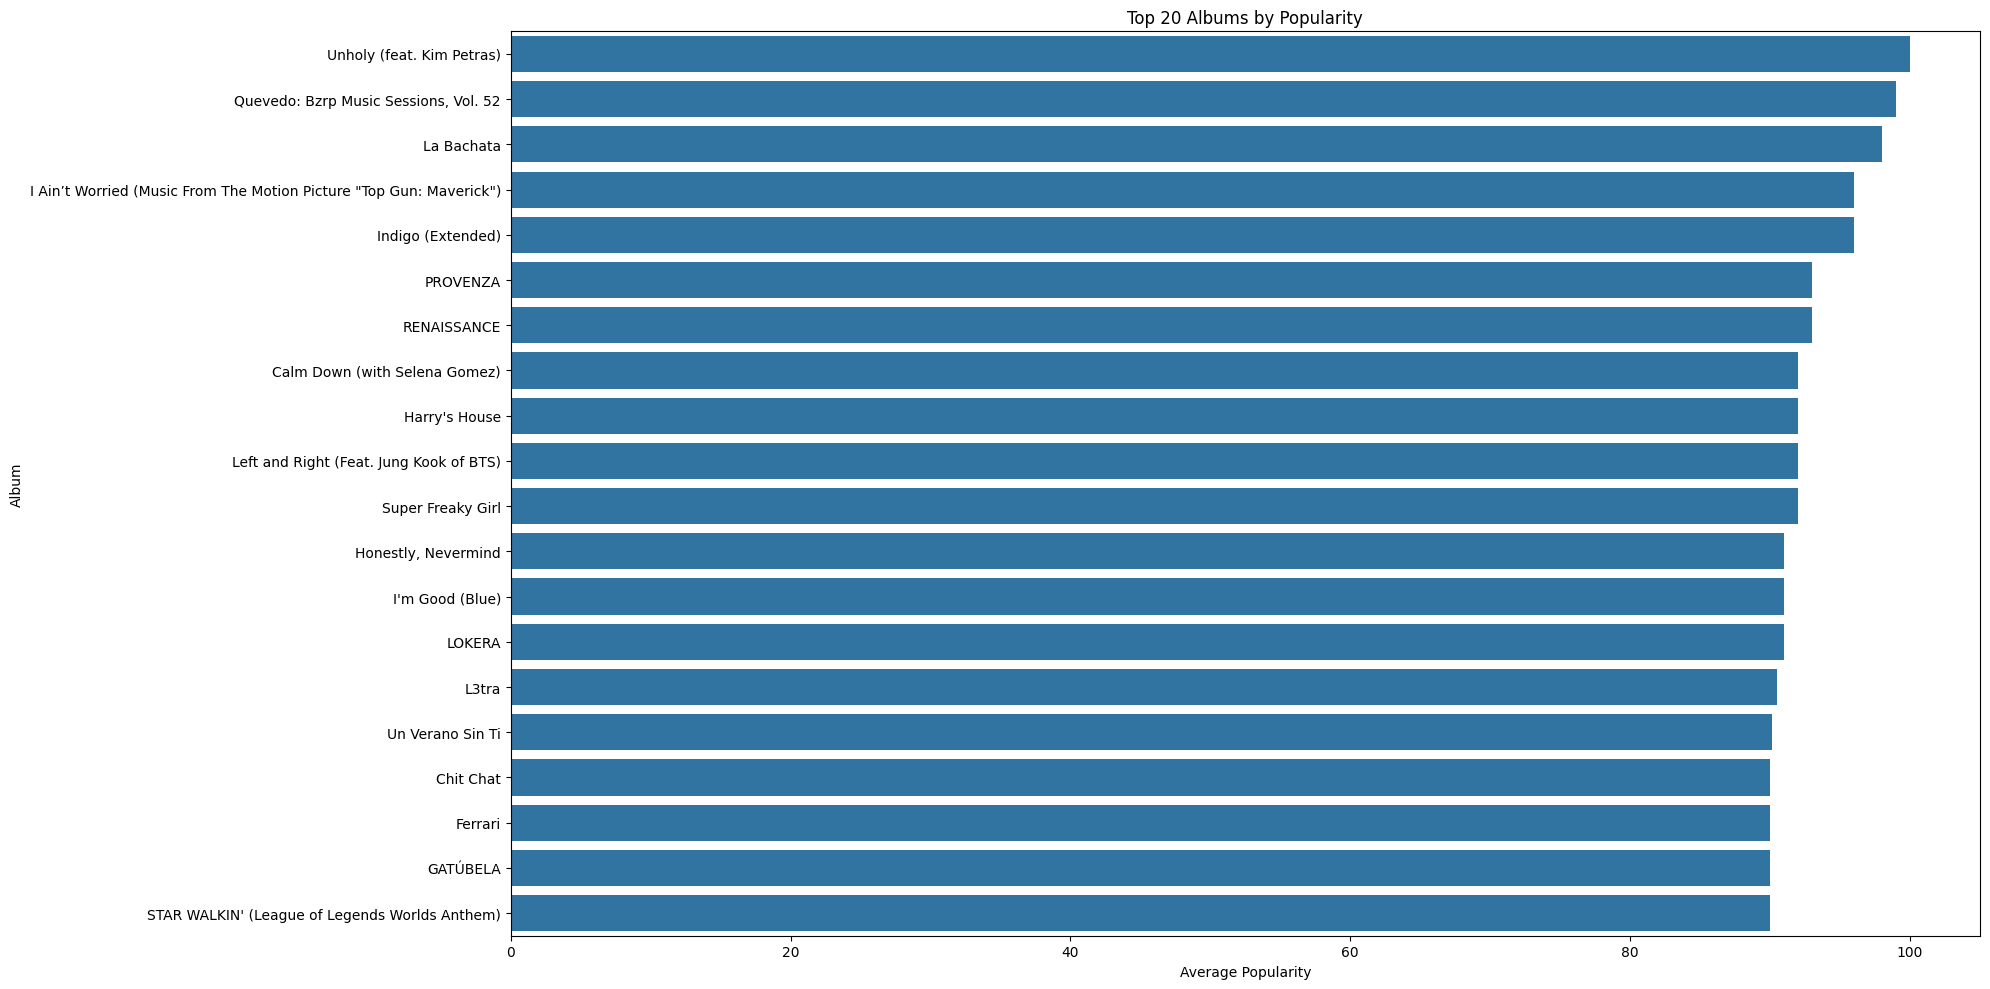

In [18]:
# Aggregate popularity scores by album name
album_popularity = df.groupby('album_name')['popularity'].mean().reset_index()

# Select the top 20 albums
top_20_albums = album_popularity.nlargest(20, 'popularity')

# Plotting the top 20 albums with horizontal bars
plt.figure(figsize=(20, 10))
sns.barplot(data=top_20_albums, y='album_name', x='popularity', orient='h')
plt.title('Top 20 Albums by Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Album')
plt.tight_layout()
plt.show()


# Top 20 Tracks:

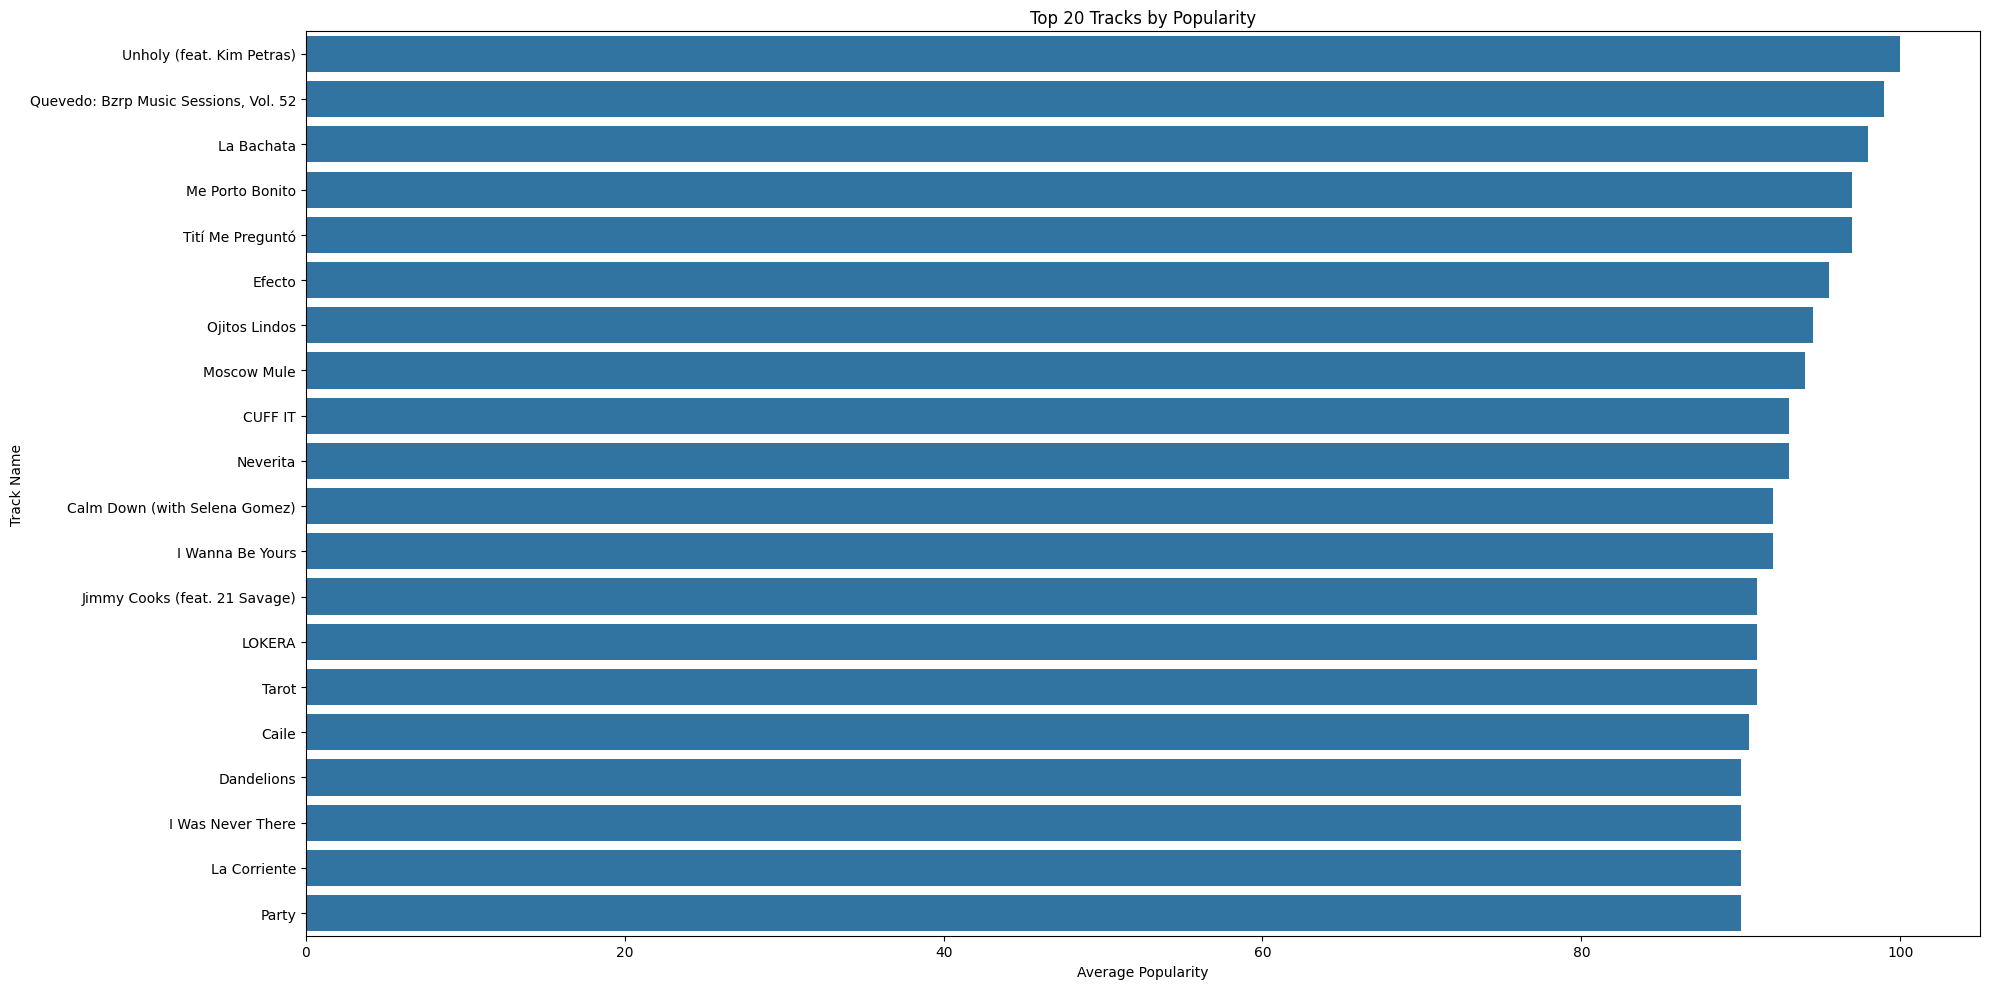

In [19]:
# Aggregate popularity scores by track_name
track_popularity = df.groupby('track_name')['popularity'].mean().reset_index()

# Select the top 20 tracks
top_20_tracks = track_popularity.nlargest(20, 'popularity')

# Plotting the top 20 tracks with horizontal bars
plt.figure(figsize=(20, 10))
sns.barplot(data=top_20_tracks, y='track_name', x='popularity', orient='h')
plt.title('Top 20 Tracks by Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Track Name')
plt.tight_layout()
plt.show()


# Top 20 Genre:

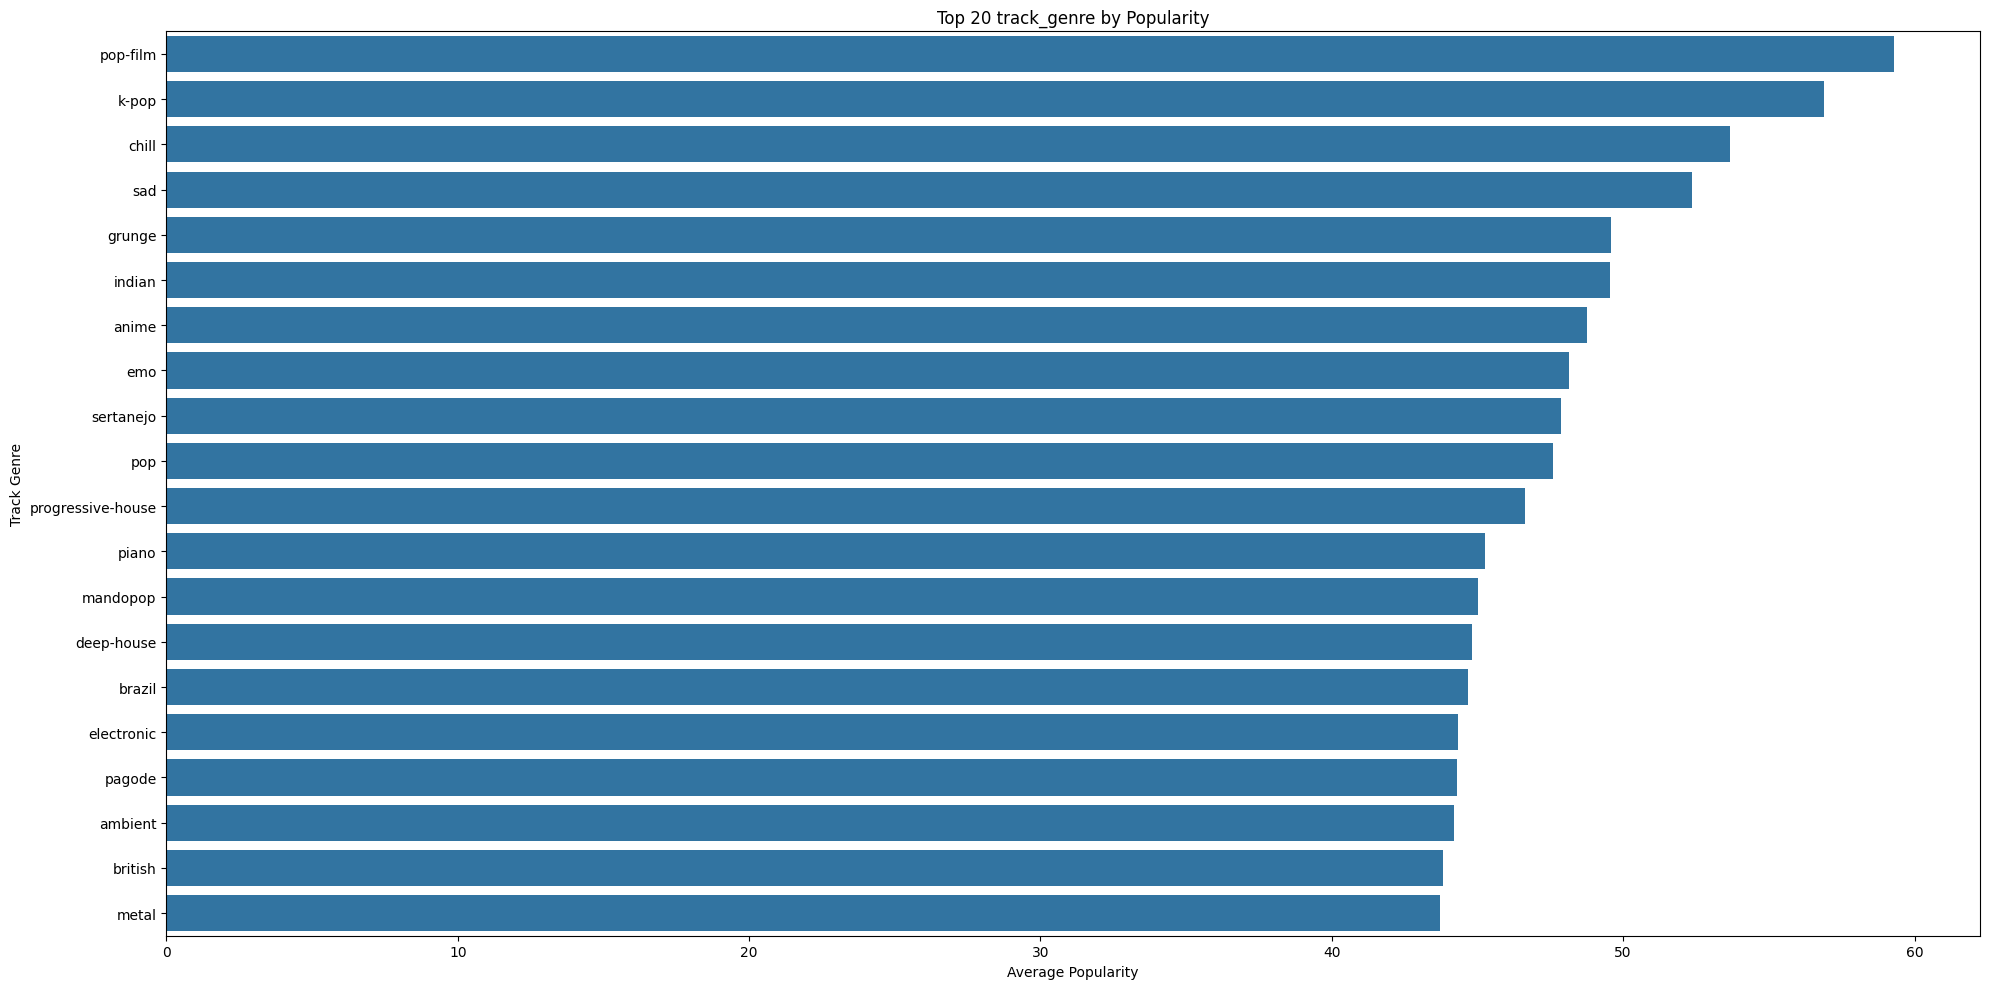

In [21]:
# Aggregate popularity scores by track_genre
track_popularity = df.groupby('track_genre')['popularity'].mean().reset_index()

# Select the top 20 track_genre
top_20_tracks = track_popularity.nlargest(20, 'popularity')

# Plotting the top 20 track_genre with horizontal bars
plt.figure(figsize=(20, 10))
sns.barplot(data=top_20_tracks, y='track_genre', x='popularity', orient='h')
plt.title('Top 20 track_genre by Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Track Genre')
plt.tight_layout()
plt.show()


# Linear Regression Analysis:

We will use the ElasticNet Regression Model and see the most important features to predict Popularity of a music track.

In [ ]:
df.drop(columns=['Unnamed: 0','track_id','artists','album_name','track_name'],inplace = True)

In [27]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='popularity'), df['popularity'], test_size=0.20, random_state=42)



# Identify categorical and numerical columns
categorical_columns = x_train.select_dtypes(include=['object']).columns
numerical_columns = x_train.select_dtypes(include=['number']).columns

# Preprocessing with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

# Fit and transform the training set
x_train_preprocessed = preprocessor.fit_transform(x_train, y_train)

# Transform the test set
x_test_preprocessed = preprocessor.transform(x_test)

# Train the Elastic Net regression model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust alpha and l1_ratio as needed
elastic_net_model.fit(x_train_preprocessed, y_train)

# Get feature names after one-hot encoding
onehot_categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
feature_names = np.concatenate((numerical_columns, onehot_categorical_feature_names))

# Get coefficients of the Elastic Net model
coefficients = elastic_net_model.coef_

# Create a DataFrame to store feature names and their coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by absolute coefficient value
coefficients_df['AbsoluteCoefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='AbsoluteCoefficient', ascending=False)

# Display the top 10 most important features
print("Top 10 Most Important Features:")
print(coefficients_df.head(10))


Top 10 Most Important Features:
                       Feature  Coefficient  AbsoluteCoefficient
8             instrumentalness    -1.175404             1.175404
10                     valence    -0.651517             0.651517
6                  speechiness    -0.406852             0.406852
1                 danceability     0.246069             0.246069
4                     loudness     0.160742             0.160742
12              time_signature     0.086155             0.086155
83           track_genre_metal     0.000000             0.000000
84       track_genre_metalcore     0.000000             0.000000
85  track_genre_minimal-techno     0.000000             0.000000
86             track_genre_mpb     0.000000             0.000000


# Conclusion:

From the regression analysis we can clearly see that the Instrumentalness, Valence, Speechiness, Danceability, Loudness and time signature are the most important factors out of all that affects the Popularity of a music track on Spotify.